#**Clean & Analyze Dissertation Data** 

In [0]:
#standard imports
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.graphics.factorplots import interaction_plot
%matplotlib inline

##IND-COL Data
Read in the data. Taking only useful columns starting at 17. This way, skip the useless metadata (e.g., langague = EN, device, etc.).

In [0]:
#why is it not working :(
# from google.colab import drive
# drive.mount('/content/drive')
# ind_col=pd.read_csv('/content/drive/My Drive/Tian_dissertation_2019/Data/EN_IND-COL.csv')

In [174]:
#Read data, only take useful columns
ind_col = pd.read_csv('EN_IND-COL.csv')
ind_col = ind_col.iloc[:,18:]
print('shape: ',ind_col.shape)

shape:  (295, 67)


## IND-COL Clean dataframe
Drop useless row (where title is repeated). Rename columns with easier to understand titles. Replace all 'NaN' with value 0. If a value is 0, it stands for 'other'/'no answer' in demographic columns or 'none' in retest columns. Change dtypes from object to int. Update reverse coded questions so 7=1 and 1=7. Outlier age 1991 updated to 28.

In [0]:
#drop row 1, remove "index" 
ind_col.drop(1, axis=0, inplace=True)
ind_col.reset_index(inplace=True)
ind_col.drop(columns=['index'], axis=1, inplace=True)

In [0]:
#rename columns
#get values to rename
values_torename = []

for col_name in ind_col.iloc[0]:
  values_torename.append(col_name)

In [0]:
#define keys for dict
keys = ind_col.columns.to_list()

In [0]:
#first get these key,value pairs; use VScode to update JSON manually
dict_toupdate = dict(zip(keys, values_torename))

In [0]:
#manually updated JSON
new_dict = {'Q10': 'education_selected',
 'Q10_10_TEXT': 'education_text',
 'Q16_1':  'people_defined_attributes_individuals',
 'Q16_2':  'people_independent_social_groups',
 'Q16_3':  'individuals_groups_can_separated',
 'Q17_1': 'individual_goals_more_group_goals',
 'Q17_2': 'individuals_behaviors_individual_goals',
 'Q17_3': 'individual_cannot_sacrificed',
 'Q17_4': 'individual_more_responsibilities',
 'Q18_1': 'win_versus_harmonize',
 'Q18_2': 'success_competition',
 'Q18_3': 'competition_more_harmony',
 'Q19_1': 'people_should_freewill',
 'Q19_2': 'disagree_follow_your_opinion',
 'Q19_3': 'individuality_morerespected_conformity',
 'Q23':  'informed_consent',
 'Q28_1': 'similar_john',
 'Q28_2': 'similar_alex',
 'Q28_3': 'identity_john',
 'Q28_4': 'identity_alex',
 'Q30_1': 'buy_pen',
 'Q30_2': 'try_pen',
 'Q30_3': 'vist_pen',
 'Q30_4': 'recommend_pen',
 'Q31': 'number_recomendations',
 'Q32': 'expensive_pen',
 'Q33': 'cheap_pen',
 'Q34_1': 'appealing',
 'Q34_10': 'sophisticated',
 'Q34_11': 'coherent',
 'Q34_12': 'high_quality',
 'Q34_2': 'informative',
 'Q34_3': 'useful',
 'Q34_4': 'positive',
 'Q34_5': 'good',
 'Q34_6': 'favorable',
 'Q34_7': 'attractive',
 'Q34_8': 'exciting',
 'Q34_9': 'clear',
 'Q35_1': 'attitude_dsesign',
 'Q35_2': 'attitude_trustworthiness',
 'Q35_3': 'attitude_reliability',
 'Q37': 'character_attended_school',
 'Q38': 'character_least_similar',
 'Q39': 'character_most_similar',
 'Q4': 'languages_selected',
 'Q40_1': 'recommendations_dependable',
 'Q40_2': 'recommendations_reliable',
 'Q40_3': 'recommendations_trustworthy',
 'Q40_4': 'recommendations_sincere',
 'Q42_1': 'pens_important',
 'Q42_2': 'pens_not_matter*',
 'Q42_3': 'pens_important_life',
 'Q42_4': 'pens_choose_carefully',
 'Q42_5': 'pens_use_matters',
 'Q42_6': 'pens_important_decison',
 'Q4_3_TEXT': 'languages_text',
 'Q5': 'age',
 'Q53': 're_character_attended_school',
 'Q54': 're_character_least_similar',
 'Q55': 're_character_most_similar',
 'Q6': 'sex',
 'Q7': 'country_born_selected',
 'Q7_5_TEXT': 'country_born_text',
 'Q8': 'ethnicity',
 'Q9': 'nationality_selected',
 'Q9_4_TEXT': 'nationality_text',
 'Random ID': 'random_id'}

In [0]:
#remane columns, drop row with old col names
ind_col.rename(columns=new_dict, inplace=True)
ind_col.drop(0, axis=0, inplace=True)
ind_col.reset_index(inplace=True)

#drop the extra index
ind_col.drop(columns=['index'], axis=1, inplace=True)

In [0]:
#some cells have two inputs '1,2'
#remove second number
ind_col['languages_selected'] = ind_col['languages_selected'].str.split(',').str[0]
ind_col['country_born_selected'] = ind_col['country_born_selected'].str.split(',').str[0]
ind_col['ethnicity'] = ind_col['ethnicity'].str.split(',').str[0]
ind_col['sex'] = ind_col['sex'].str.split(',').str[0]
ind_col['nationality_selected'] = ind_col['nationality_selected'].str.split(',').str[0]
ind_col['education_selected'] = ind_col['education_selected'].str.split(',').str[0]

In [182]:
#check na
print(ind_col.isna().sum())

# replace na with 0
ind_col.fillna(0, inplace=True)

languages_selected               4
languages_text                 286
age                              4
sex                              5
country_born_selected            4
                              ... 
recommendations_dependable      32
recommendations_reliable        32
recommendations_trustworthy     32
recommendations_sincere         32
random_id                        1
Length: 67, dtype: int64


In [183]:
#since the 'langague_text' have 0 to represent other
print('langague selected:\n', ind_col.languages_selected.value_counts())

#drop text fields
ind_col.drop(columns=['languages_text', 'country_born_text', 'nationality_text', 'education_text'], inplace=True)

langague selected:
 1    289
0      4
Name: languages_selected, dtype: int64


In [184]:
#all data types are objects, convert to int
ind_col = ind_col.astype('int')
print(ind_col.dtypes)

languages_selected             int64
age                            int64
sex                            int64
country_born_selected          int64
ethnicity                      int64
                               ...  
recommendations_dependable     int64
recommendations_reliable       int64
recommendations_trustworthy    int64
recommendations_sincere        int64
random_id                      int64
Length: 63, dtype: object


In [0]:
#change reverse coded questions so 1=7, 2=3, 3=4, 4=5, 5=6, 6=7 and 7=1
def reverseScoring(df, high, cols):
    '''Reverse scores on given columns
     df = your data frame,
     high = highest score available
     cols = the columns you want reversed in list form'''
    df[cols] = high - df[cols]
    return df

#call function
ind_col = reverseScoring(ind_col, 7, ['pens_not_matter*'])

In [0]:
#change the outliers in age
ind_col.age.replace({1991:28, 1989:30, 1992:27}, inplace=True)

In [187]:
ind_col.head(2)

,languages_selected,age,sex,country_born_selected,ethnicity,nationality_selected,education_selected,people_defined_attributes_individuals,people_independent_social_groups,individuals_groups_can_separated,individual_goals_more_group_goals,individuals_behaviors_individual_goals,individual_cannot_sacrificed,individual_more_responsibilities,win_versus_harmonize,success_competition,competition_more_harmony,people_should_freewill,disagree_follow_your_opinion,individuality_morerespected_conformity,character_attended_school,character_least_similar,character_most_similar,re_character_attended_school,re_character_least_similar,re_character_most_similar,similar_john,similar_alex,identity_john,identity_alex,pens_important,pens_not_matter*,pens_important_life,pens_choose_carefully,pens_use_matters,pens_important_decison,number_recomendations,expensive_pen,cheap_pen,buy_pen,try_pen,vist_pen,recommend_pen,appealing,informative,useful,positive,good,favorable,attractive,exciting,clear,sophisticated,coherent,high_quality,attitude_dsesign,attitude_trustworthiness,attitude_reliability,recommendations_dependable,recommendations_reliable,recommendations_trustworthy,recommendations_sincere,random_id
0,1,32,1,2,1,1,5,5,7,7,6,4,6,0,6,5,6,7,5,7,2,1,2,0,0,0,7,6,6,7,6,2,5,6,6,7,2,2,4,6,5,5,6,5,4,5,5,4,3,3,4,4,5,3,5,6,7,6,7,6,5,6,4983
1,1,38,1,2,1,1,7,2,2,6,2,1,2,0,2,2,2,3,2,2,2,1,2,0,0,0,2,5,2,5,2,2,3,2,2,2,2,2,4,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,1,3,5,5,5,5,5,5,7249


## IND-COL Assign classes to each ID 
* IND-COL
* 1 = experiment; df = ind_col_1
* 0 = control; df = ind_col_0

In [0]:
## NEW DICT AFTER SURVEY COUNT INCREASED 

condition_id_pg1_NEW_1_11_20 = {'6552':1,'3095':1,'7391':0,'1067':1,'3983':0,
                              '7819':1,'8745':0,'8745':1,'9157':0,'6406':0}

condition_id_pg1_NEW_NEW_1_10 = {'2564':None, '2484':None, '9829':0, '5503':1, '3009':1,
                                 '9169': None, '5113':None, '1873':None, '7036':None, '4941':0 }

condition_id_pg1_NEW_NEW_11_20 = {'1664':1,'9581':None,'8345':1,'1246':None,'7048':None, 
                                  '7489':1, '8235':1, '6098':1, '4092':0, '3597':0}
                                  
condition_id_pg2_NEW_NEW_1_10 = {'2828':None, '1435':None, '1996':1, '7728':0, '2398':0,
                                 '6009':None, '4747':None, '5383':None,'3261':1, '4576':1}

condition_id_pg2_NEW_NEW_11_20 = {'5832':1,'8848':None,'5048':None,'8204':None,'3297':None, 
                                  '9942':None,'5441':None,'6062':1,'8254':1,'8413':0}

condition_id_pg3_NEW_NEW_1_10 = {'7863':None,'7755':None,'4315':1, '7820':None, '5001':0,
                                 '2639':None, '8730':0, '8909':1, '7500':1, '1083':1}

#this one repeats
condition_id_pg3_NEW_NEW_11_20 = {'1202':0, '4573':1,'5891':1,'1431':0,'8709':0,
                                 '1044':1,'3297':0,'6552':1,'3095':1,'7391':0}
#this one repeats
condition_id_pg4_NEW_NEW_1_10 = {'1067':1, '3983':0, '7819':1, '4902':0, '8745':1,
                                 '9157':0, '6406':0, '5477':0, '8588':0, '2189':1}

condition_id_pg4_NEW_NEW_11_20 = {'2781':1,'3127':1,'9405':0,'7320':1,'2029':0,
                                  '4858':1,'5164':1,'3364':0,'1807':0,'7247':1}

condition_id_pg5_NEW_NEW_1_10 = {'7653':0,'6949':0, '2509':0, '1515':1, '3773':1,
                                 '1240':1, '3070':1,'4932':0, '4259':0, '7177':1}

condition_id_pg5_NEW_NEW_11_20 = {'8169':0,'9306':0,'3600':1,'8667':0,'1383':1,
                                  '5536':1,'8005':1,'2790':0,'9953':1,'4788':0}

condition_id_pg6_NEW_NEW_1_10 = {'9176':0,'4427':1,'4188':0, '7478':1,'9372':0,
                                 '8879':1,'3332':1,'3745':0,'8507':1, '8385':1}

condition_id_pg6_NEW_NEW_11_20 = {'1768':0,'9779':1,'3662':1,'2609':0,'4415':0, 
                                  '2125':1, '5182':0,'8992':0,'6693':1,'9696':1}

condition_id_pg7_NEW_NEW_1_10 = {'7250':0,'6324':1,'7710':0,'4506':1,'2427':0,
                                 '8608':1, '4274':0,'7995':1,'9109':0,'5178':0}

condition_id_pg7_NEW_NEW_11_20 = {'3718':1,'7687':0,'2278':0,'6702':1,'4438':1,
                                  '4358':1,'6620':0,'7380':1,'2988':1,'4671':0}

condition_id_pg8_NEW_NEW_1_10 = {'1038':1, '1631':0, '1631':0, '3208':1, '4008':0,
                                 '2016':1, '8749':0, '8530':0, '4429':0, '3455':0}

condition_id_pg8_NEW_NEW_11_20 = {'6175':1,'3752':0,'1625':0,'3055':1,'7602':1,
                                  '8532':0,'9587':1,'7503':0,'2939':0,'6157':0}

condition_id_pg9_NEW_NEW_1_10 = {'2113':1,'3762':1,'5866':1,'9946':0,'4400':1,
                                 '6410':1,'3671':0,'1744':1,'8322':0,'6435':0}

condition_id_pg9_NEW_NEW_11_20 = {'1384':0,'9415':0,'3539':1,'2764':1,'5773':1,
                                  '8037':1,'5764':0,'6577':1,'1675':1,'4698':0}

condition_id_pg10_NEW_NEW_1_10 = {'5975':1,'5558':1,'3057':0,'4091':0,'6331':0,
                                  '9098':1,'4571':0,'8854':0,'8375':1,'7978':1}

condition_id_pg10_NEW_NEW_11_20 = {'7134':0,'4172':0,'6407':1,'4139':1,'7787':1,
                                   '6375':0,'1315':0,'1573':1,'5974':1,'1365':0}

condition_id_pg11_NEW_NEW_1_10 = {'6426':0,'2950':0,'9478':0,'5635':0,'3439':1,
                                 '5346':1,'8832':0,'7895':0,'9856':1,'1568':1}

condition_id_pg11_NEW_NEW_11_20 = {'4852':0,'3133':1,'1209':0,'5813':1,'7008':0,
                                   '7185':0,'3135':1,'8075':0,'8821':0,'4454':0}

condition_id_pg12_NEW_NEW_1_10 = {'3709':1,'4849':0,'6449':0,'8237':0,'7361':1,
                                  '9989':1,'6012':1,'5989':1,'3656':0,'6405':0}
####
condition_id_pg12_NEW_NEW_11_20 = {}


In [189]:
#make new full ind-col condition list since so many new ones were collected
ind_col_condition = {'6552':1,'3095':1,'7391':0,'1067':1,'3983':0,'7819':1,'8745':0,'8745':1,'9157':0,'6406':0,
                     '2564':None, '2484':None, '9829':0, '5503':1, '3009':1,'9169': None, '5113':None, '1873':None, '7036':None, '4941':0,
                     '1664':1,'9581':None,'8345':1,'1246':None,'7048':None,'7489':1, '8235':1, '6098':1, '4092':0, '3597':0, 
                     '2828':None, '1435':None, '1996':1, '7728':0, '2398':0, '6009':None, '4747':None, '5383':None,'3261':1, '4576':1,
                     '5832':1,'8848':None,'5048':None,'8204':None,'3297':None,'9942':None,'5441':None,'6062':1,'8254':1,'8413':0,
                     '7863':None,'7755':None,'4315':1, '7820':None, '5001':0,'2639':None, '8730':0, '8909':1, '7500':1, '1083':1,
                     '1202':0, '4573':1,'5891':1,'1431':0,'8709':0,'1044':1,'3297':0,'6552':1,'3095':1,'7391':0,
                     '1067':1, '3983':0, '7819':1, '4902':0, '8745':1,'9157':0, '6406':0, '5477':0, '8588':0, '2189':1,
                     '2781':1,'3127':1,'9405':0,'7320':1,'2029':0,'4858':1,'5164':1,'3364':0,'1807':0,'7247':1,
                     '7653':0,'6949':0, '2509':0, '1515':1, '3773':1,'1240':1, '3070':1,'4932':0, '4259':0, '7177':1,
                     '8169':0,'9306':0,'3600':1,'8667':0,'1383':1,'5536':1,'8005':1,'2790':0,'9953':1,'4788':0,
                     '9176':0,'4427':1,'4188':0, '7478':1,'9372':0,'8879':1,'3332':1,'3745':0,'8507':1, '8385':1,
                     '1768':0,'9779':1,'3662':1,'2609':0,'4415':0,'2125':1, '5182':0,'8992':0,'6693':1,'9696':1,
                     '7250':0,'6324':1,'7710':0,'4506':1,'2427':0,'8608':1, '4274':0,'7995':1,'9109':0,'5178':0,
                     '3718':1,'7687':0,'2278':0,'6702':1,'4438':1,'4358':1,'6620':0,'7380':1,'2988':1,'4671':0,
                     '1038':1, '1631':0, '1631':0, '3208':1, '4008':0,'2016':1, '8749':0, '8530':0, '4429':0, '3455':0,
                     '6175':1,'3752':0,'1625':0,'3055':1,'7602':1,'8532':0,'9587':1,'7503':0,'2939':0,'6157':0,
                     '2113':1,'3762':1,'5866':1,'9946':0,'4400':1,'6410':1,'3671':0,'1744':1,'8322':0,'6435':0,
                     '1384':0,'9415':0,'3539':1,'2764':1,'5773':1,'8037':1,'5764':0,'6577':1,'1675':1,'4698':0,
                     '5975':1,'5558':1,'3057':0,'4091':0,'6331':0,'9098':1,'4571':0,'8854':0,'8375':1,'7978':1, 
                     '7134':0,'4172':0,'6407':1,'4139':1,'7787':1,'6375':0,'1315':0,'1573':1,'5974':1,'1365':0,
                     '6426':0,'2950':0,'9478':0,'5635':0,'3439':1,'5346':1,'8832':0,'7895':0,'9856':1,'1568':1,
                     '4852':0,'3133':1,'1209':0,'5813':1,'7008':0,'7185':0,'3135':1,'8075':0,'8821':0,'4454':0,
                     '3709':1,'4849':0,'6449':0,'8237':0,'7361':1,'9989':1,'6012':1,'5989':1,'3656':0,'6405':0}

#convert keys to int
ind_col_condition = {int(k):v for k,v in ind_col_condition.items()}
print(ind_col_condition)

{6552: 1, 3095: 1, 7391: 0, 1067: 1, 3983: 0, 7819: 1, 8745: 1, 9157: 0, 6406: 0, 2564: None, 2484: None, 9829: 0, 5503: 1, 3009: 1, 9169: None, 5113: None, 1873: None, 7036: None, 4941: 0, 1664: 1, 9581: None, 8345: 1, 1246: None, 7048: None, 7489: 1, 8235: 1, 6098: 1, 4092: 0, 3597: 0, 2828: None, 1435: None, 1996: 1, 7728: 0, 2398: 0, 6009: None, 4747: None, 5383: None, 3261: 1, 4576: 1, 5832: 1, 8848: None, 5048: None, 8204: None, 3297: 0, 9942: None, 5441: None, 6062: 1, 8254: 1, 8413: 0, 7863: None, 7755: None, 4315: 1, 7820: None, 5001: 0, 2639: None, 8730: 0, 8909: 1, 7500: 1, 1083: 1, 1202: 0, 4573: 1, 5891: 1, 1431: 0, 8709: 0, 1044: 1, 4902: 0, 5477: 0, 8588: 0, 2189: 1, 2781: 1, 3127: 1, 9405: 0, 7320: 1, 2029: 0, 4858: 1, 5164: 1, 3364: 0, 1807: 0, 7247: 1, 7653: 0, 6949: 0, 2509: 0, 1515: 1, 3773: 1, 1240: 1, 3070: 1, 4932: 0, 4259: 0, 7177: 1, 8169: 0, 9306: 0, 3600: 1, 8667: 0, 1383: 1, 5536: 1, 8005: 1, 2790: 0, 9953: 1, 4788: 0, 9176: 0, 4427: 1, 4188: 0, 7478: 1, 937

In [190]:
#add condition column
ind_col["condition"] = ind_col["random_id"].apply(lambda x: ind_col_condition.get(x))
ind_col.condition.value_counts()

1.0    104
0.0    104
Name: condition, dtype: int64

In [191]:
#drop all where condition is not 0.0 or 1.0
ind_col_0 = ind_col[ind_col['condition']==0.0]
ind_col_1 = ind_col[ind_col['condition']==1.0]

#concat frames to have where conditions are 0 or 1, remove all others
frames = [ind_col_0, ind_col_1]
ind_col = pd.concat(frames)

#after selecting where conditions are 0 or 1, all na removed
ind_col.isna().sum()

languages_selected             0
age                            0
sex                            0
country_born_selected          0
ethnicity                      0
                              ..
recommendations_reliable       0
recommendations_trustworthy    0
recommendations_sincere        0
random_id                      0
condition                      0
Length: 64, dtype: int64

In [192]:
#why does it make an index and level 0 col?
ind_col.reset_index(inplace=True)
ind_col.drop(columns=['index'], axis=1, inplace=True)
ind_col.head(2)

,languages_selected,age,sex,country_born_selected,ethnicity,nationality_selected,education_selected,people_defined_attributes_individuals,people_independent_social_groups,individuals_groups_can_separated,individual_goals_more_group_goals,individuals_behaviors_individual_goals,individual_cannot_sacrificed,individual_more_responsibilities,win_versus_harmonize,success_competition,competition_more_harmony,people_should_freewill,disagree_follow_your_opinion,individuality_morerespected_conformity,character_attended_school,character_least_similar,character_most_similar,re_character_attended_school,re_character_least_similar,re_character_most_similar,similar_john,similar_alex,identity_john,identity_alex,pens_important,pens_not_matter*,pens_important_life,pens_choose_carefully,pens_use_matters,pens_important_decison,number_recomendations,expensive_pen,cheap_pen,buy_pen,try_pen,vist_pen,recommend_pen,appealing,informative,useful,positive,good,favorable,attractive,exciting,clear,sophisticated,coherent,high_quality,attitude_dsesign,attitude_trustworthiness,attitude_reliability,recommendations_dependable,recommendations_reliable,recommendations_trustworthy,recommendations_sincere,random_id,condition
0,1,25,2,2,1,1,5,6,7,6,7,6,7,0,6,5,6,5,6,6,2,1,2,0,0,0,6,7,6,7,7,1,7,6,7,6,2,2,4,7,6,7,6,5,4,5,5,5,4,4,5,4,5,5,4,7,6,6,6,7,6,6,8667,0.0
1,1,34,2,2,4,3,5,6,7,4,4,6,4,0,1,1,1,6,4,6,2,1,2,0,0,0,4,7,4,7,5,6,6,6,7,6,2,3,4,6,7,6,7,4,3,5,5,5,5,5,4,5,4,5,4,6,6,7,6,6,7,7,8821,0.0


## IND-COL DV columns
Take the average of scores to represent IND-COL (high=individualism, low=collectivism). For each id, create new column "avg_ind". Take sum responses/n if "individual_more_responsibilities" !=0. If "individual_more_responsibilities" == 0, take sum responses/n-1. Define threshold to split groups (e.g., thres=0.5). Create new column to identify if respondent is high vs. low on individualism. Create columns that gives a score for each of the DVs. Take average for Likert scale, create binary for others.

In [0]:
#print col names to sum over
vals = ind_col.iloc[:,8:20].columns.values

In [0]:
#create list for cols to sum over
individualism_cols = ['people_defined_attributes_individuals',
       'people_independent_social_groups', 'individuals_groups_can_separated',
       'individual_goals_more_group_goals',
       'individuals_behaviors_individual_goals',
       'individual_cannot_sacrificed', 'individual_more_responsibilities',
       'win_versus_harmonize', 'success_competition',
       'competition_more_harmony', 'people_should_freewill',
       'disagree_follow_your_opinion',
       'individuality_morerespected_conformity']

involvment_cols = ['pens_important', 'pens_not_matter*','pens_important_life', 'pens_choose_carefully', 'pens_use_matters','pens_important_decison']
purchase_intention_cols = ['buy_pen', 'try_pen', 'vist_pen', 'recommend_pen']
adjective_cols = ['appealing', 'informative', 'useful', 'positive', 'good', 'favorable','attractive', 'exciting', 'clear', 'sophisticated', 'coherent', 'high_quality']
attitude_cols = ['attitude_dsesign', 'attitude_trustworthiness','attitude_reliability']
trust_cols = ['recommendations_dependable','recommendations_reliable', 'recommendations_trustworthy','recommendations_sincere']

In [0]:
#take sum/n of values if no 0, if 0, take sum/n-1
ind_col['avg_ind'] = np.where(ind_col['individual_more_responsibilities']==0, (ind_col[individualism_cols].sum(axis=1))/(len(individualism_cols)-1) ,(ind_col[individualism_cols].sum(axis=1))/len(individualism_cols))

#create cols for other DVs
ind_col['avg_involvment'] = ind_col[involvment_cols].sum(axis=1)/len(involvment_cols)
ind_col['avg_purchase_intention'] = ind_col[purchase_intention_cols].sum(axis=1)/len(purchase_intention_cols)
ind_col['avg_attitude'] = ind_col[attitude_cols].sum(axis=1)/len(attitude_cols)
ind_col['avg_trust_cols'] = ind_col[trust_cols].sum(axis=1)/len(trust_cols)

In [0]:
#define high, low classes
ind_col['age_class'] = np.where(ind_col['age']<=35, 1,0)
ind_col['ind_class'] = np.where(ind_col['avg_ind']>=5, 1,0)

In [197]:
ind_col.astype({'ind_class': 'float'}).dtypes

languages_selected          int64
age                         int64
sex                         int64
country_born_selected       int64
ethnicity                   int64
                           ...   
avg_purchase_intention    float64
avg_attitude              float64
avg_trust_cols            float64
age_class                   int64
ind_class                 float64
Length: 71, dtype: object

In [198]:
ind_col.head(2)

,languages_selected,age,sex,country_born_selected,ethnicity,nationality_selected,education_selected,people_defined_attributes_individuals,people_independent_social_groups,individuals_groups_can_separated,individual_goals_more_group_goals,individuals_behaviors_individual_goals,individual_cannot_sacrificed,individual_more_responsibilities,win_versus_harmonize,success_competition,competition_more_harmony,people_should_freewill,disagree_follow_your_opinion,individuality_morerespected_conformity,character_attended_school,character_least_similar,character_most_similar,re_character_attended_school,re_character_least_similar,re_character_most_similar,similar_john,similar_alex,identity_john,identity_alex,pens_important,pens_not_matter*,pens_important_life,pens_choose_carefully,pens_use_matters,pens_important_decison,number_recomendations,expensive_pen,cheap_pen,buy_pen,try_pen,vist_pen,recommend_pen,appealing,informative,useful,positive,good,favorable,attractive,exciting,clear,sophisticated,coherent,high_quality,attitude_dsesign,attitude_trustworthiness,attitude_reliability,recommendations_dependable,recommendations_reliable,recommendations_trustworthy,recommendations_sincere,random_id,condition,avg_ind,avg_involvment,avg_purchase_intention,avg_attitude,avg_trust_cols,age_class,ind_class
0,1,25,2,2,1,1,5,6,7,6,7,6,7,0,6,5,6,5,6,6,2,1,2,0,0,0,6,7,6,7,7,1,7,6,7,6,2,2,4,7,6,7,6,5,4,5,5,5,4,4,5,4,5,5,4,7,6,6,6,7,6,6,8667,0.0,6.083333,5.666667,6.5,6.333333,6.25,1,1
1,1,34,2,2,4,3,5,6,7,4,4,6,4,0,1,1,1,6,4,6,2,1,2,0,0,0,4,7,4,7,5,6,6,6,7,6,2,3,4,6,7,6,7,4,3,5,5,5,5,5,4,5,4,5,4,6,6,7,6,6,7,7,8821,0.0,4.166667,6.000000,6.5,6.333333,6.50,1,0


## IND-COL Visualizations and EDA

<function matplotlib.pyplot.tight_layout>

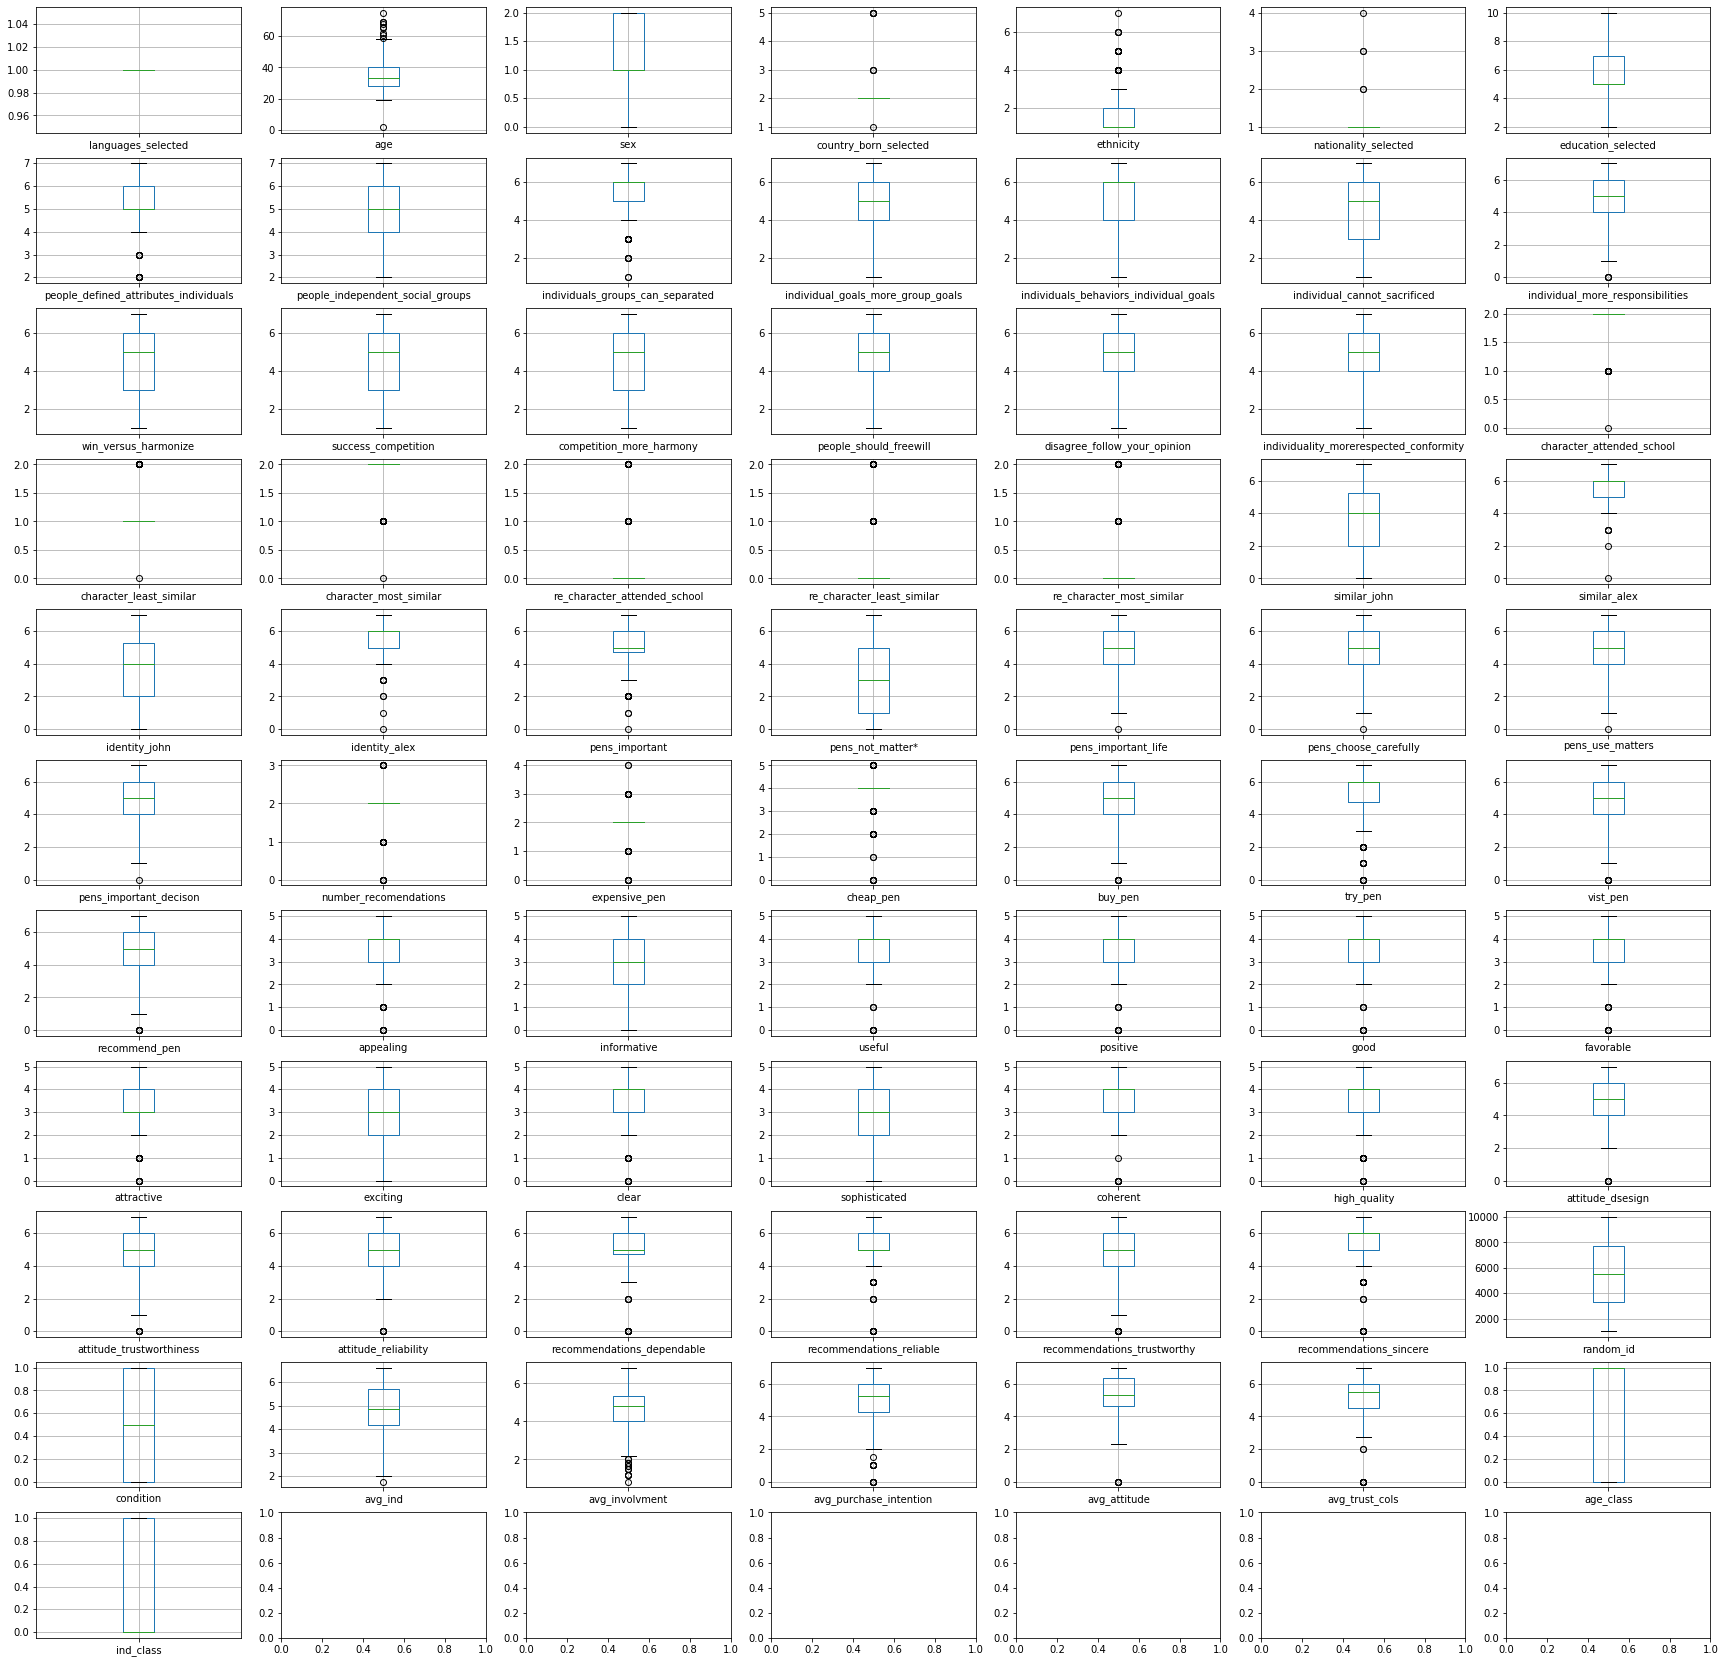

In [199]:
#print boxplots
fig, ax = plt.subplots(11,7, figsize=(30,30))
ax = ax.ravel()

for idx, col in enumerate(ind_col.columns):
  ind_col.boxplot(col, ax=ax[idx])
plt.tight_layout

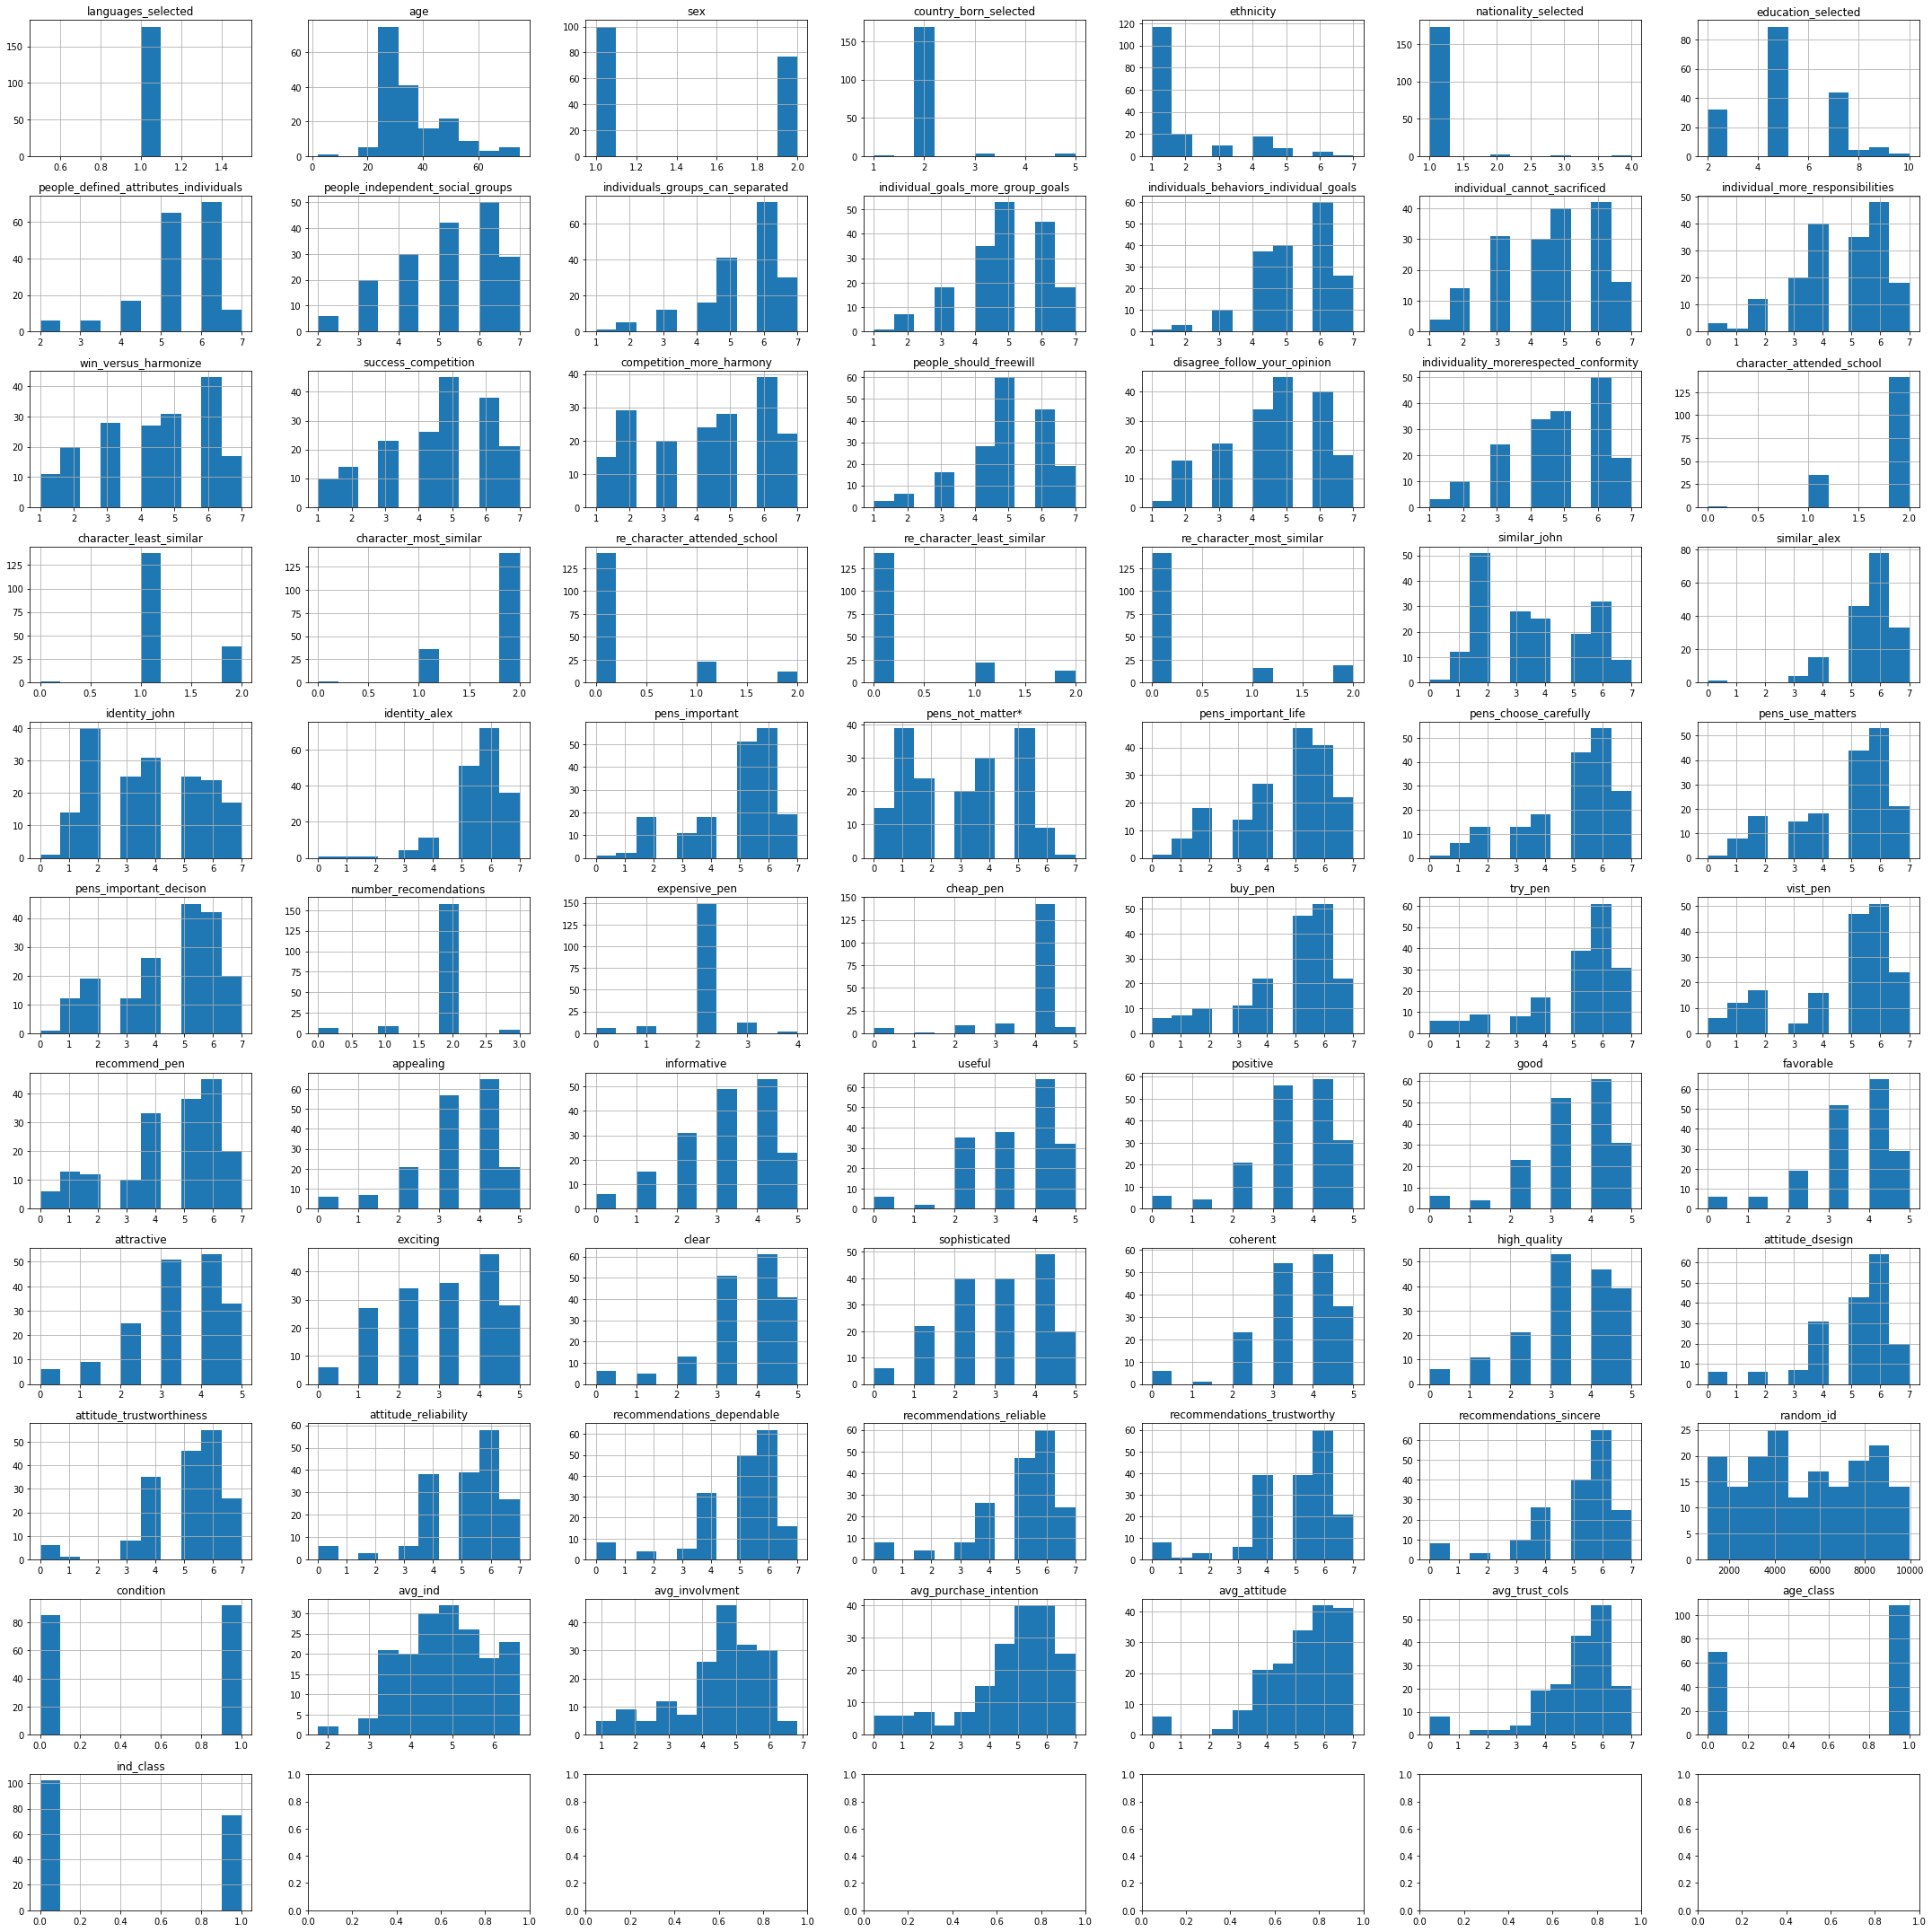

In [0]:
#print histograms
fig, ax = plt.subplots(11,7, figsize=(30,30))
ax = ax.ravel()

for idx, col in enumerate(ind_col.columns):
  ind_col.hist(col, ax=ax[idx])
plt.tight_layout()

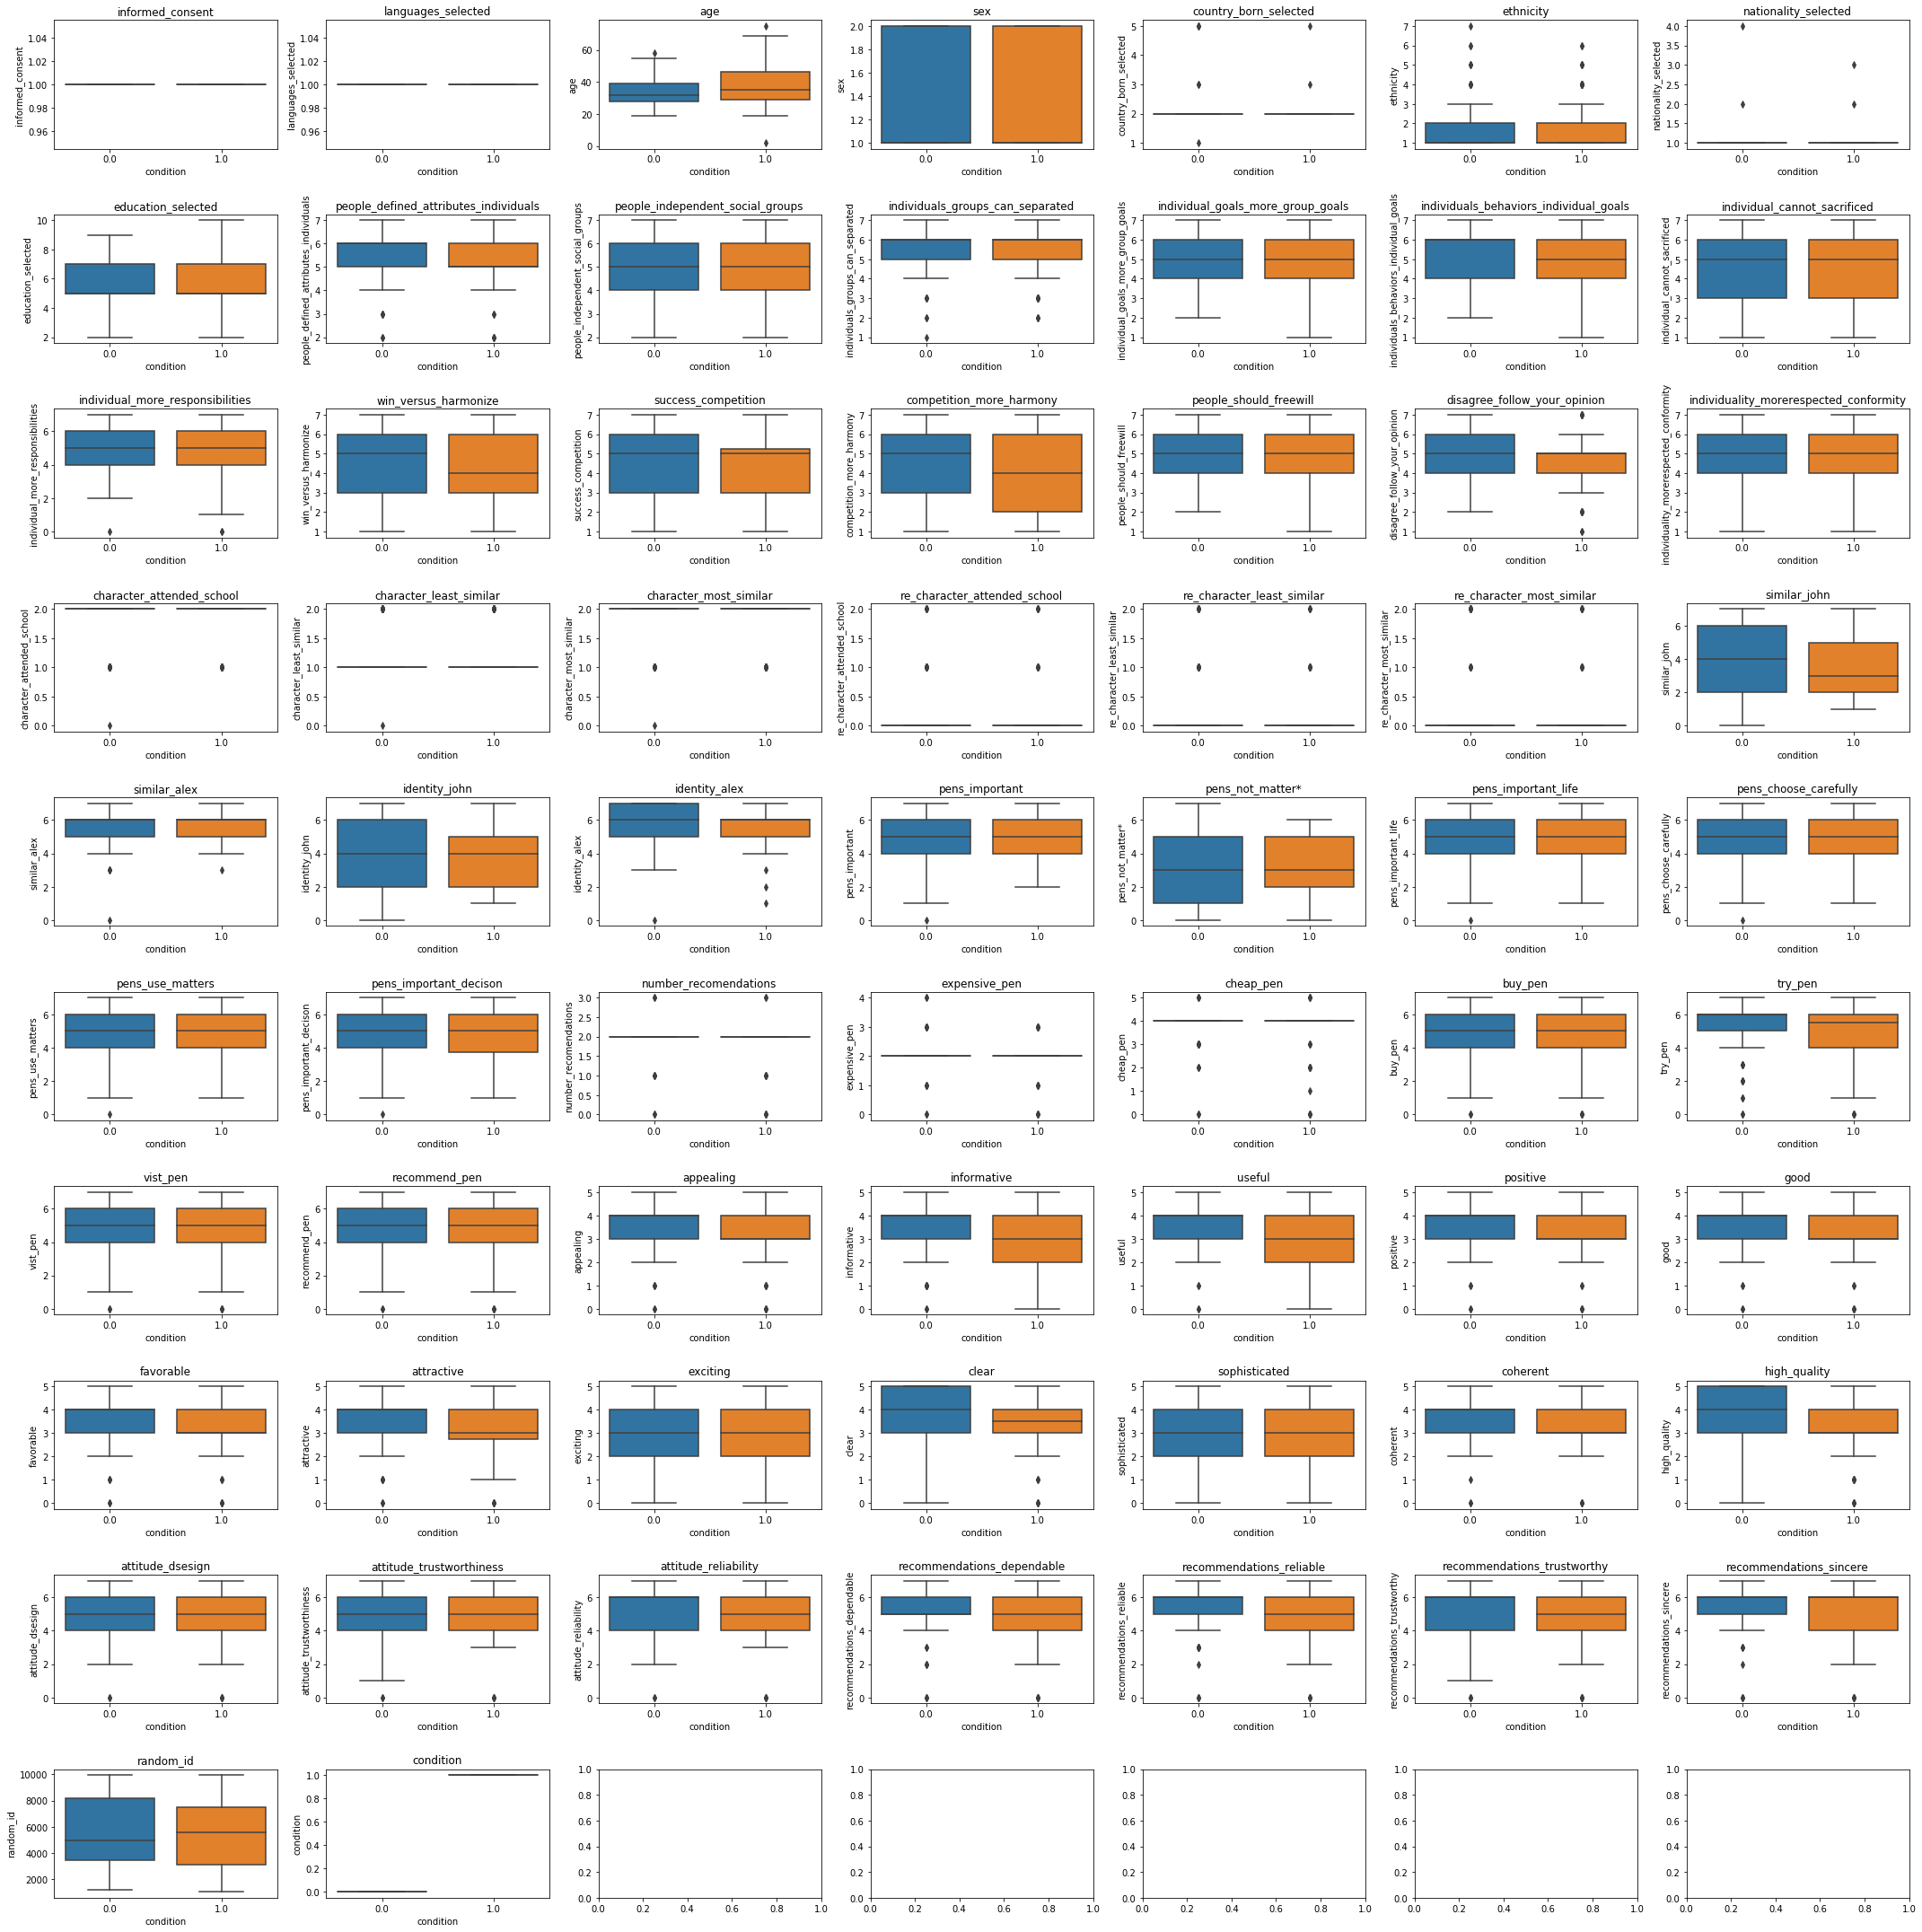

In [0]:
#sns boxplots
fig, ax = plt.subplots(10,7, figsize=(30,30))
ax = ax.ravel()

for idx, col in enumerate(ind_col.columns):
  sns.boxplot(x='condition', y=col, data=ind_col, ax=ax[idx])
  ax[idx].set_title(col)
plt.tight_layout()

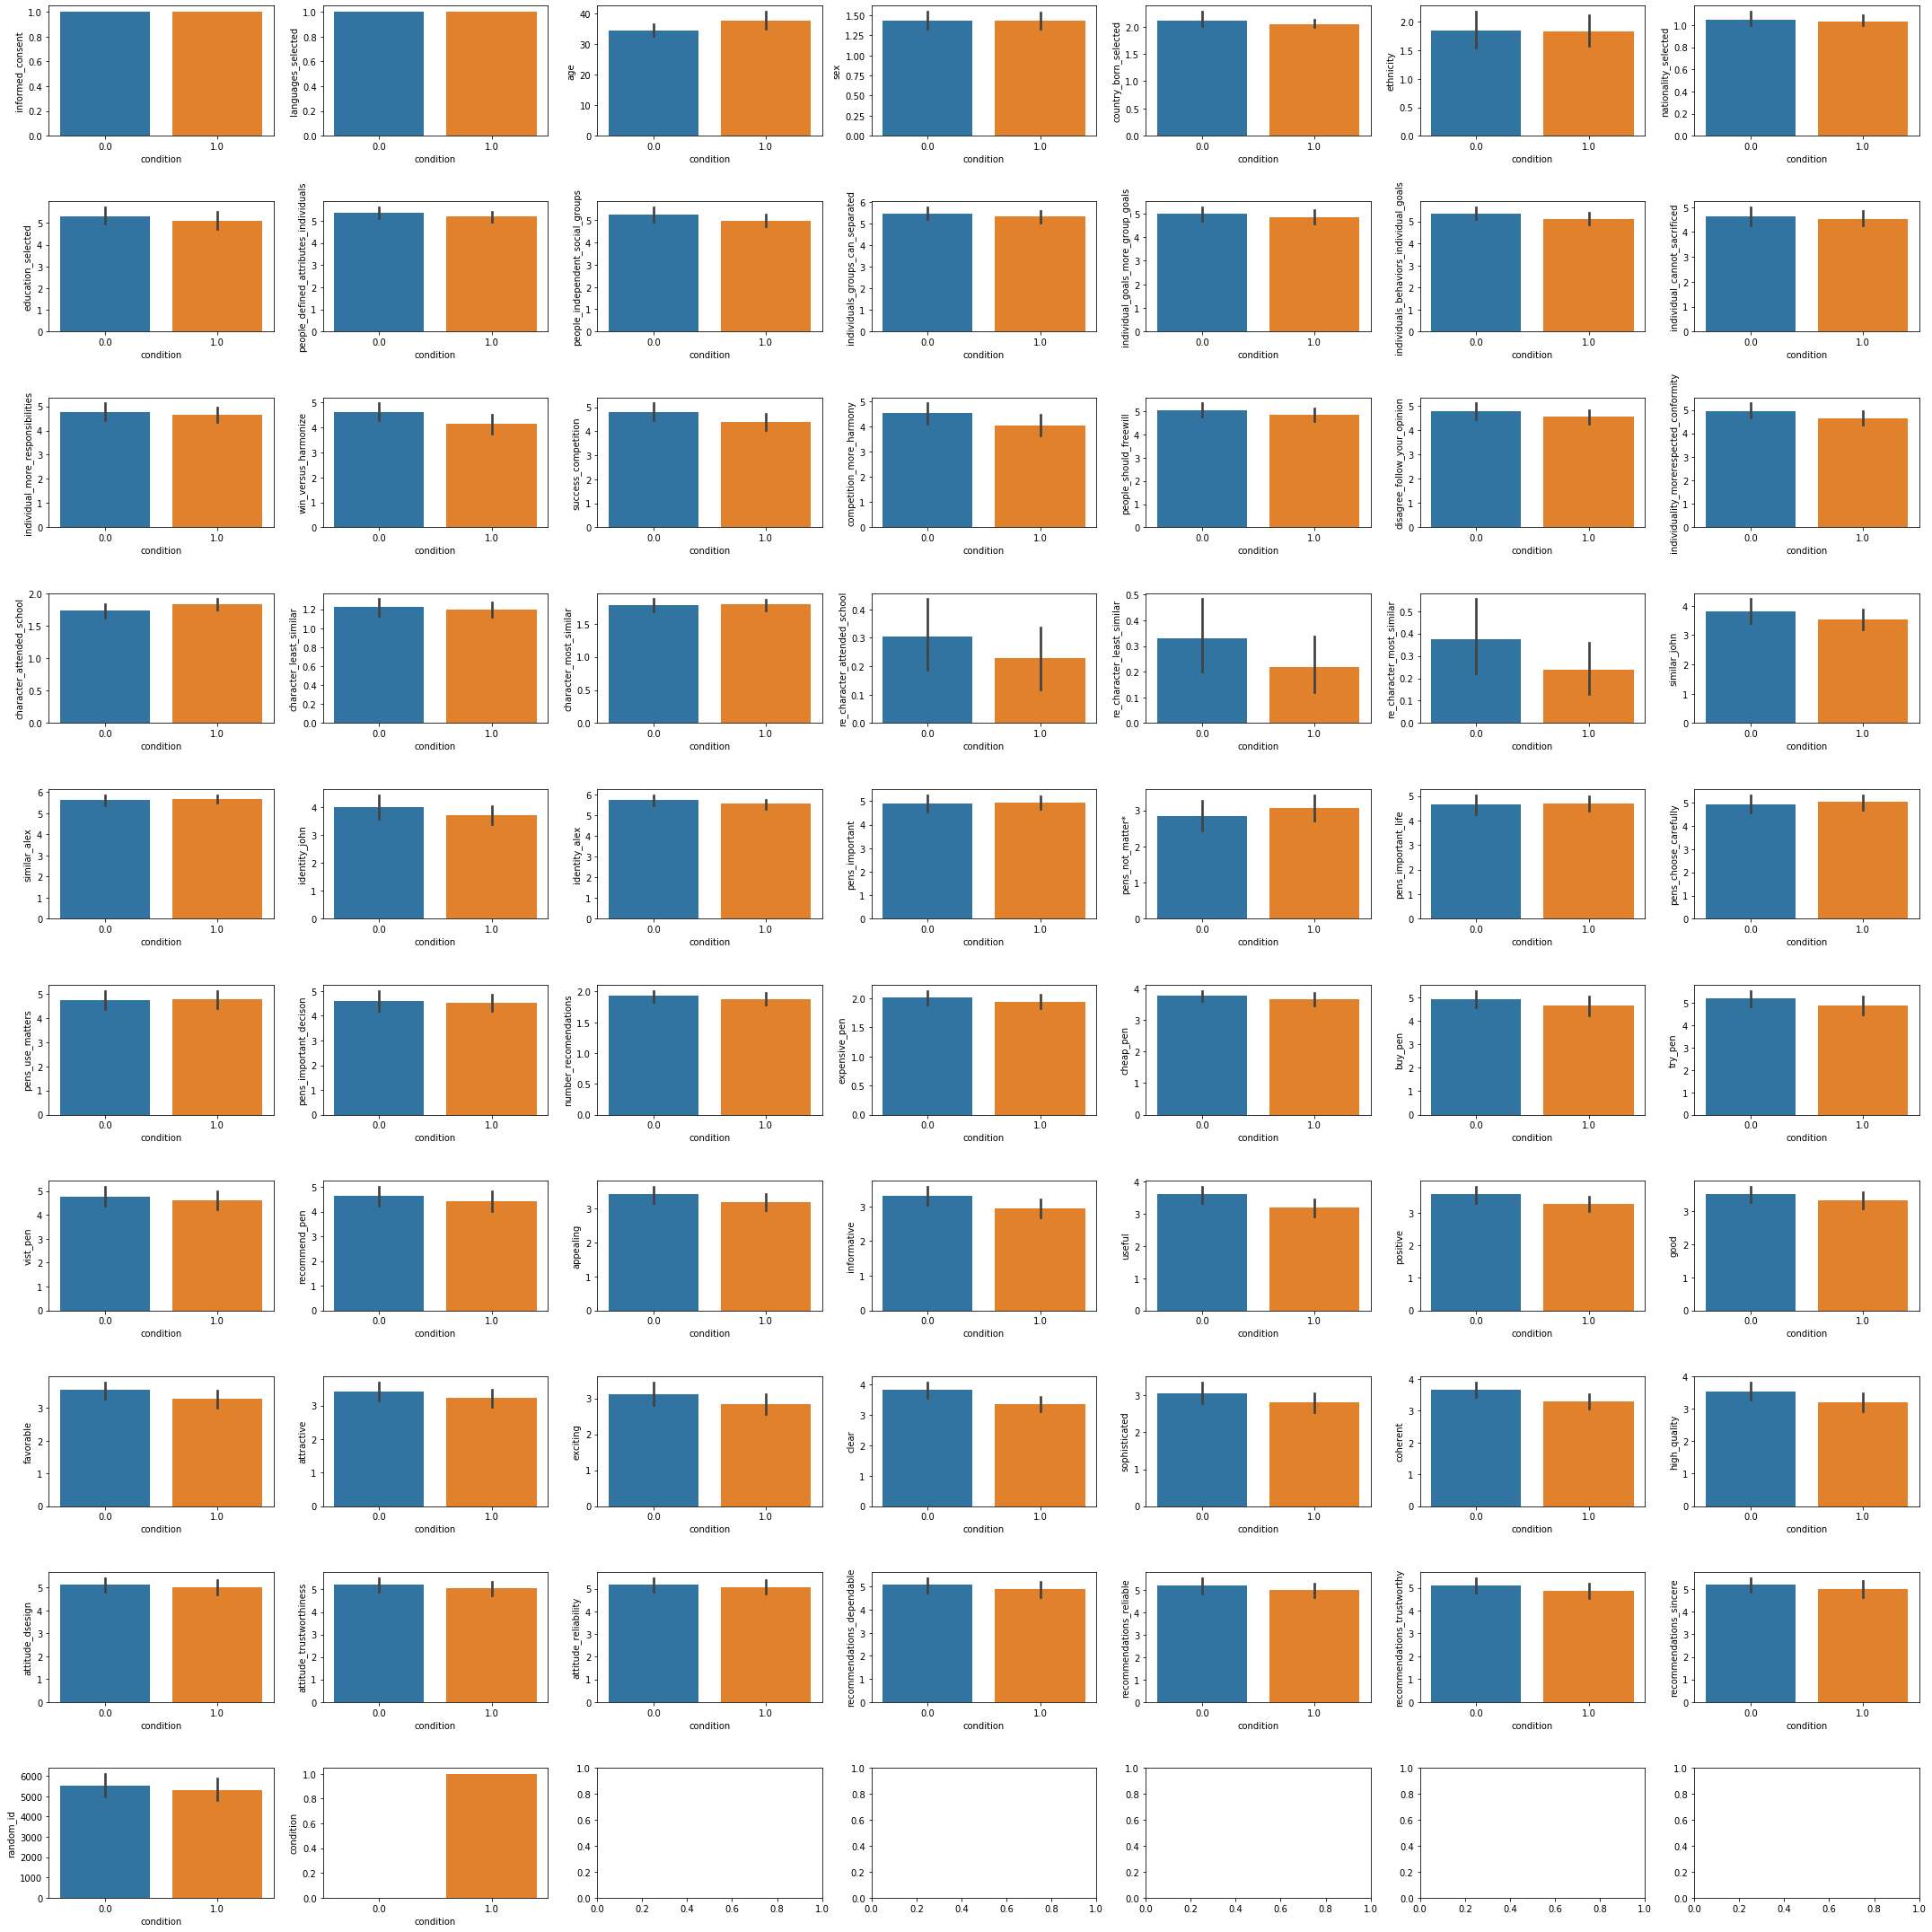

In [0]:
#sns barplots
fig, ax = plt.subplots(10,7, figsize=(30,30))
ax = ax.ravel()

for idx, col in enumerate(ind_col.columns):
  sns.barplot(x='condition', y=col, data=ind_col, ax=ax[idx])
plt.tight_layout()

## IND-COL Statistics

In [0]:
#imports
import researchpy as rp
import seaborn as sns

import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels

!pip install researchpy

In [0]:
#make factors
#rename condition groups
ind_col.loc[ind_col['condition'] == 0, 'condition'] = 'control'
ind_col.loc[ind_col['condition'] == 1, 'condition'] = 'experimental'

#rename age groups
ind_col.loc[ind_col['age_class'] == 0, 'age_class'] = 'younger'
ind_col.loc[ind_col['age_class'] == 1, 'age_class'] = 'older'

#rename ind class groups
ind_col.loc[ind_col['ind_class'] == 0, 'ind_class'] = 'low_ind'
ind_col.loc[ind_col['ind_class'] == 1, 'ind_class'] = 'high_ind'

# ind_col['condition'] = ind_col['condition'].astype(str)
# ind_col['ind_class'] = ind_col['ind_class'].astype(str)

### Stats Functions
Define functions to call for reach DV

In [0]:
def effect_size(aov):
  'take result from aov table, return with effect size'
  aov['mean_sq'] = aov[:]['sum_sq']/aov[:]['df']
  aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])
  aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
  
  cols = ['sum_sq', 'mean_sq', 'df', 'F', 'PR(>F)', 'eta_sq', 'omega_sq']
  aov = aov[cols]
  return aov

def plot_interaction(df,dependent, independent_a, independent_b):
  print('Interaction plot for {}~{}*{}\n'.format(dependent,independent_a,independent_b))
  interaction_plot(df[independent_a], df[independent_b], df[dependent])
  plt.show()
  return

#fit model with interaction, model overall sig and summary
def anova_interaction(df, dependent, independent_a, independent_b):
  '''Find interaction between dv and two ivs. Dv and ivs must be str.
  Prints significance for overall interaction model and model summary.
  '''
  model = ols('{} ~ C({})*C({})'.format(dependent, independent_a, independent_b), df).fit()
  print('interaction for {}~{}*{}'.format(dependent, independent_a, independent_b))
  print(f"Overall model F({model.df_model: .0f},{model.df_resid: .0f}) = {model.fvalue: .3f}, p = {model.f_pvalue: .4f}")
  print('\n Interaction Model Summary:')
  print(model.summary())
  print('\n Interaction ANOVA Table')
  res =  (sm.stats.anova_lm(model, typ= 2))
  print(res)
  print('\n Interaction ANOVA Effect Size')
  print(effect_size(res))
  return

#fit model with no interaction, model overall sig and summary
def anova_main_effects(df, dependent, independent_a, independent_b):
  '''Find main effects for dv and two ivs. Dv and ivs must be str.
  Prints significance for overall main effects model and model summary.
  '''
  model = ols('{} ~ C({})+C({})'.format(dependent, independent_a, independent_b), df).fit()
  print('main effects for {}~{}+{}'.format(dependent, independent_a, independent_b))
  print(f"Overall model F({model.df_model: .0f},{model.df_resid: .0f}) = {model.fvalue: .3f}, p = {model.f_pvalue: .4f}")
  print('\n Main Effects Model Summary:')
  print(model.summary())
  print('\n Main Effects ANOVA Table')
  res =  (sm.stats.anova_lm(model, typ= 2))
  print(res)
  print('\n Main Effects ANOVA Effect Size')
  print(effect_size(res))
  return

#post-hoc tukey HSD
def tukey_HSD(df, dependent,independent):
  '''dep and ind must be str'''
  print('tukey HSD for dv: {} and iv: {}\n'.format(dependent,independent))
  mc = statsmodels.stats.multicomp.MultiComparison(df[dependent], df[independent])
  mc_results = mc.tukeyhsd()
  print(mc_results)
  return

#difference in mean between two groups
def mean_diff(df,dependent,independent):
  '''dep and ind must be str'''
  print('mean diff in {} grouped by {}\n'.format(dependent,independent))
  groupby= df.groupby(independent)
  for group, value in groupby[dependent]:
    print(group, value.mean())
  return

###IND-COL Run Stats for all DVs

* 'avg_involvment'
* 'avg_purchase_intention'
* 'avg_attitude'
* 'avg_trust_cols'

#### Involvement

In [223]:
#avg_involvment interaction effects
anova_interaction(ind_col, 'avg_involvment', 'condition', 'ind_class')

interaction for avg_involvment~condition*ind_class
Overall model F( 3, 204) =  10.261, p =  0.0000

 Interaction Model Summary:
                            OLS Regression Results                            
Dep. Variable:         avg_involvment   R-squared:                       0.131
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     10.26
Date:                Sat, 14 Dec 2019   Prob (F-statistic):           2.54e-06
Time:                        16:43:58   Log-Likelihood:                -327.78
No. Observations:                 208   AIC:                             663.6
Df Residuals:                     204   BIC:                             676.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err        

Interaction plot for avg_involvment~condition*ind_class



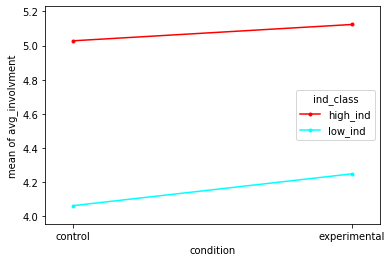

In [224]:
plot_interaction(ind_col, 'avg_involvment', 'condition', 'ind_class')

In [82]:
#avg_inovlment main effects 
anova_main_effects(ind_col, 'avg_involvment', 'condition', 'ind_class')

main effects for avg_involvment~condition+ind_class
Overall model F( 2, 205) =  15.424, p =  0.0000

 Main Effects Model Summary:
                            OLS Regression Results                            
Dep. Variable:         avg_involvment   R-squared:                       0.131
Model:                            OLS   Adj. R-squared:                  0.122
Method:                 Least Squares   F-statistic:                     15.42
Date:                Sat, 14 Dec 2019   Prob (F-statistic):           5.75e-07
Time:                        14:57:22   Log-Likelihood:                -327.82
No. Observations:                 208   AIC:                             661.6
Df Residuals:                     205   BIC:                             671.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025     

In [124]:
tukey_HSD(ind_col,'avg_involvment','condition')

tukey HSD for dv: avg_involvment and iv: condition

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
   0.0    1.0   0.0224 0.8982 -0.3224 0.3672  False
---------------------------------------------------


In [104]:
mean_diff(ind_col,'avg_involvment','condition')

mean diff in avg_involvment grouped by condition

0.0 4.554487179487177
1.0 4.5769230769230775


In [94]:
mean_diff(ind_col,'avg_involvment','ind_class')

mean diff in avg_involvment grouped by ind_class

0 4.166666666666667
1 5.068840579710147


#### Purchase Intention

In [50]:
#avg_purchase_intention interaction effects
anova_interaction(ind_col, 'avg_purchase_intention', 'condition', 'ind_class')

interaction for avg_purchase_intention~condition*ind_class
Overall model F( 3, 204) =  9.972, p =  0.0000

 Interaction Model Summary:
                              OLS Regression Results                              
Dep. Variable:     avg_purchase_intention   R-squared:                       0.128
Model:                                OLS   Adj. R-squared:                  0.115
Method:                     Least Squares   F-statistic:                     9.972
Date:                    Sat, 14 Dec 2019   Prob (F-statistic):           3.66e-06
Time:                            14:09:17   Log-Likelihood:                -377.15
No. Observations:                     208   AIC:                             762.3
Df Residuals:                         204   BIC:                             775.6
Df Model:                               3                                         
Covariance Type:                nonrobust                                         
                                   

Interaction plot for avg_purchase_intention~condition*ind_class



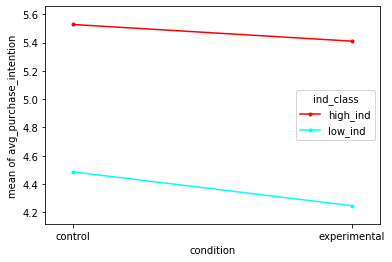

In [225]:
plot_interaction(ind_col, 'avg_purchase_intention', 'condition', 'ind_class')

In [51]:
#avg_inovlment main effects 
anova_main_effects(ind_col, 'avg_purchase_intention', 'condition', 'ind_class')

main effects for avg_purchase_intention~condition+ind_class
Overall model F( 2, 205) =  14.984, p =  0.0000

 Main Effects Model Summary:
                              OLS Regression Results                              
Dep. Variable:     avg_purchase_intention   R-squared:                       0.128
Model:                                OLS   Adj. R-squared:                  0.119
Method:                     Least Squares   F-statistic:                     14.98
Date:                    Sat, 14 Dec 2019   Prob (F-statistic):           8.44e-07
Time:                            14:10:30   Log-Likelihood:                -377.19
No. Observations:                     208   AIC:                             760.4
Df Residuals:                         205   BIC:                             770.4
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
                          coef  

In [52]:
tukey_HSD(ind_col,'avg_purchase_intention','condition')

tukey HSD for dv: avg_purchase_intention and iv: condition

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
   0.0    1.0  -0.3341 0.1305 -0.7681 0.0998  False
---------------------------------------------------


In [95]:
mean_diff(ind_col,'avg_purchase_intention','condition')

mean diff in avg_purchase_intention grouped by condition

0.0 5.016826923076923
1.0 4.6826923076923075


In [96]:
mean_diff(ind_col,'avg_involvment','ind_class')

mean diff in avg_involvment grouped by ind_class

0 4.166666666666667
1 5.068840579710147


#### Attitude

In [54]:
anova_interaction(ind_col, 'avg_attitude', 'condition', 'ind_class')

interaction for avg_attitude~condition*ind_class
Overall model F( 3, 204) =  6.540, p =  0.0003

 Interaction Model Summary:
                            OLS Regression Results                            
Dep. Variable:           avg_attitude   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     6.540
Date:                Sat, 14 Dec 2019   Prob (F-statistic):           0.000304
Time:                        14:13:03   Log-Likelihood:                -348.81
No. Observations:                 208   AIC:                             705.6
Df Residuals:                     204   BIC:                             719.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|    

Interaction plot for avg_attitude~condition*ind_class



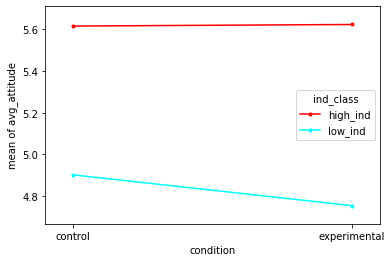

In [226]:
plot_interaction(ind_col, 'avg_attitude', 'condition', 'ind_class')

In [55]:
anova_main_effects(ind_col, 'avg_attitude', 'condition', 'ind_class')

main effects for avg_attitude~condition+ind_class
Overall model F( 2, 205) =  9.760, p =  0.0001

 Main Effects Model Summary:
                            OLS Regression Results                            
Dep. Variable:           avg_attitude   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     9.760
Date:                Sat, 14 Dec 2019   Prob (F-statistic):           8.94e-05
Time:                        14:13:41   Log-Likelihood:                -348.90
No. Observations:                 208   AIC:                             703.8
Df Residuals:                     205   BIC:                             713.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.

In [58]:
tukey_HSD(ind_col,'avg_attitude','condition')

tukey HSD for dv: avg_attitude and iv: condition

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
   0.0    1.0  -0.1859 0.3249 -0.5573 0.1855  False
---------------------------------------------------


In [98]:
mean_diff(ind_col,'avg_attitude','condition')

mean diff in avg_attitude grouped by condition

0.0 5.2660256410256405
1.0 5.080128205128205


In [97]:
mean_diff(ind_col,'avg_attitude','ind_class')

mean diff in avg_attitude grouped by ind_class

0 4.81896551724138
1 5.619565217391303


#### Trust

In [56]:
anova_interaction(ind_col, 'avg_trust_cols', 'condition', 'ind_class')

interaction for avg_trust_cols~condition*ind_class
Overall model F( 3, 204) =  8.069, p =  0.0000

 Interaction Model Summary:
                            OLS Regression Results                            
Dep. Variable:         avg_trust_cols   R-squared:                       0.106
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     8.069
Date:                Sat, 14 Dec 2019   Prob (F-statistic):           4.18e-05
Time:                        14:16:52   Log-Likelihood:                -354.15
No. Observations:                 208   AIC:                             716.3
Df Residuals:                     204   BIC:                             729.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|  

Interaction plot for avg_trust_cols~condition*ind_class



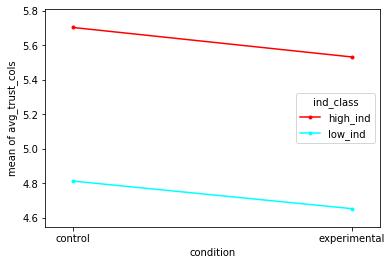

In [227]:
plot_interaction(ind_col, 'avg_trust_cols', 'condition', 'ind_class')

In [57]:
anova_main_effects(ind_col, 'avg_trust_cols', 'condition', 'ind_class')

main effects for avg_trust_cols~condition+ind_class
Overall model F( 2, 205) =  12.162, p =  0.0000

 Main Effects Model Summary:
                            OLS Regression Results                            
Dep. Variable:         avg_trust_cols   R-squared:                       0.106
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     12.16
Date:                Sat, 14 Dec 2019   Prob (F-statistic):           1.02e-05
Time:                        14:17:17   Log-Likelihood:                -354.15
No. Observations:                 208   AIC:                             714.3
Df Residuals:                     205   BIC:                             724.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025     

In [60]:
tukey_HSD(ind_col,'avg_trust_cols','condition')

tukey HSD for dv: avg_trust_cols and iv: condition

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
   0.0    1.0  -0.2837 0.1467 -0.6676 0.1003  False
---------------------------------------------------


In [100]:
mean_diff(ind_col,'avg_trust_cols','condition')

mean diff in avg_trust_cols grouped by condition

0.0 5.266826923076923
1.0 4.983173076923077


In [99]:
mean_diff(ind_col,'avg_trust_cols','ind_class')

mean diff in avg_trust_cols grouped by ind_class

0 4.724137931034483
1 5.630434782608695


### DV - Attitude

In [0]:
#fit model with interaction, includes main effects 
model = ols('avg_attitude ~ C(condition)*C(ind_class)', ind_col).fit()

#check if overall model is significant
print(f"Overall model F({model.df_model: .0f},{model.df_resid: .0f}) = {model.fvalue: .3f}, p = {model.f_pvalue: .4f}")

Overall model F( 3, 204) =  6.540, p =  0.0003


Overall model is significant. Check assumptions.

* The Durban-Watson tests is to detect the presence of autocorrelation
* Jarque-Bera tests the assumption of normality
* Omnibus tests the assumption of homogeneity of variance
* Condition Number assess multicollinearity. Condition Number values over 20 are indicative of multicollinearity. 

The model passes the assumption check. Look at the ANOVA table.



In [0]:
#overall model sig, check assumptions
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           avg_attitude   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     4.462
Date:                Thu, 12 Dec 2019   Prob (F-statistic):            0.00479
Time:                        15:16:37   Log-Likelihood:                -304.28
No. Observations:                 177   AIC:                             616.6
Df Residuals:                     173   BIC:                             629.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                                 4.8258      0.206     23.440      0.000       4.419       5.232
C(condition)[T.1.0]                      -0.0729      0.273     -0.267      0.790      -0.612       0.466
C(ind_class)[T.1]                         0.7108      0.296      2.398      0.018       0.126       1.296
C(condition)[T.1.0]:C(ind_class)[T.1]     0.0853      0.418      0.204      0.839      -0.740       0.911
==============================================================================
Omnibus:                       82.476   Durbin-Watson:                   1.698
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.851
Skew:                          -1.879   Prob(JB):                     4.22e-64
Kurtosis:                       8.045   Cond. No.                         6.61
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The interaction is not significant. 
* There is no interaction effect between the type of recommender system and the level of ind-col attitudes toward the recommender design. 
* Since this is not significant, the interaction term is to be removed from the model to examine the main effects of each factor independently.



In [0]:
#ANOVA table
res = sm.stats.anova_lm(model, typ= 2)
res

,sum_sq,df,F,PR(>F)
C(condition),0.058152,1.0,0.031183,0.860040
C(ind_class),24.232521,1.0,12.994142,0.000408
C(condition):C(ind_class),0.077628,1.0,0.041626,0.838574
Residual,322.624307,173.0,NaN,NaN


In [0]:
#model without interaction
#overall model is significant
model2 = ols('avg_attitude ~ C(condition)+C(ind_class)', ind_col).fit()
print(f"Overall model F({model2.df_model: .0f},{model2.df_resid: .0f}) = {model2.fvalue: .3f}, p = {model2.f_pvalue: .4f}")

Overall model F( 2, 205) =  9.760, p =  0.0001


In [0]:
#passes assumptions
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           avg_attitude   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     6.709
Date:                Thu, 12 Dec 2019   Prob (F-statistic):            0.00156
Time:                        15:16:53   Log-Likelihood:                -304.30
No. Observations:                 177   AIC:                             614.6
Df Residuals:                     174   BIC:                             624.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               4.8051      0.179     26.889      0.000       4.452       5.158
C(condition)[T.1.0]    -0.0365      0.206     -0.177      0.860      -0.444       0.371
C(ind_class)[T.1]       0.7537      0.209      3.615      0.000       0.342       1.165
==============================================================================
Omnibus:                       82.915   Durbin-Watson:                   1.703
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              295.942
Skew:                          -1.886   Prob(JB):                     5.46e-65
Kurtosis:                       8.089   Cond. No.                         3.26
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* Only the independent factor 'ind_class' has a significant main effect on attitudes. 


In [0]:
res2 = sm.stats.anova_lm(model2, typ= 2)
res2

,sum_sq,df,F,PR(>F)
C(condition),0.058152,1.0,0.031355,0.859656
C(ind_class),24.232521,1.0,13.066109,0.000393
Residual,322.701935,174.0,NaN,NaN


Calculate effect size
* Condition: eta & omega-squared close to 0, very small effect size
* Ind_class: eta & omega-squared close to 0, very small effect size

In [0]:
# Calculating effect size
def anova_table(aov):
    aov['mean_sq'] = aov[:]['sum_sq']/aov[:]['df']
    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])
    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
    
    cols = ['sum_sq', 'mean_sq', 'df', 'F', 'PR(>F)', 'eta_sq', 'omega_sq']
    aov = aov[cols]
    return aov

anova_table(res2)

,sum_sq,mean_sq,df,F,PR(>F),eta_sq,omega_sq
C(condition),0.058152,0.058152,1.0,0.031355,0.859656,0.000168,-0.005150
C(ind_class),24.232521,24.232521,1.0,13.066109,0.000393,0.069836,0.064148
Residual,322.701935,1.854609,174.0,NaN,NaN,NaN,NaN


Post Hoc Test
Tukey's HSD. 
* There is no sig. differences between mean attitudes for control or experimental conditions.

In [0]:
mc = statsmodels.stats.multicomp.MultiComparison(ind_col['avg_attitude'], ind_col['condition'])
mc_results = mc.tukeyhsd()
print(mc_results)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
   0.0    1.0  -0.1859 0.3249 -0.5573 0.1855  False
---------------------------------------------------


In [0]:
#why does this one keep failing?
# mc = statsmodels.stats.multicomp.MultiComparison(ind_col['avg_attitude'], ind_col['ind_class'])
# mc_results = mc.tukeyhsd()
# print(mc_results)

### DV - Involvement

avg_involvment	avg_purchase_intention	avg_attitude	avg_trust_cols

In [0]:
#fit model with interaction, includes main effects 
model = ols('avg_involvment ~ C(condition)*C(ind_class)', ind_col).fit()

#check if overall model is significant
print(f"Overall model F({model.df_model: .0f},{model.df_resid: .0f}) = {model.fvalue: .3f}, p = {model.f_pvalue: .4f}")

Overall model F( 3, 173) =  8.978, p =  0.0000


Overall model is significant. Check assumptions.

* The Durban-Watson tests is to detect the presence of autocorrelation
* Jarque-Bera tests the assumption of normality
* Omnibus tests the assumption of homogeneity of variance
* Condition Number assess multicollinearity. Condition Number values over 20 are indicative of multicollinearity. 

The model passes the assumption check. Look at the ANOVA table.



In [0]:
#overall model sig, check assumptions
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         avg_involvment   R-squared:                       0.135
Model:                            OLS   Adj. R-squared:                  0.120
Method:                 Least Squares   F-statistic:                     8.978
Date:                Thu, 12 Dec 2019   Prob (F-statistic):           1.47e-05
Time:                        19:00:06   Log-Likelihood:                -282.42
No. Observations:                 177   AIC:                             572.8
Df Residuals:                     173   BIC:                             585.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                                 3.9621      0.182     21.776      0.000       3.603       4.321
C(condition)[T.1.0]                       0.2132      0.241      0.883      0.378      -0.263       0.689
C(ind_class)[T.1]                         1.0135      0.262      3.869      0.000       0.496       1.531
C(condition)[T.1.0]:C(ind_class)[T.1]    -0.1152      0.370     -0.312      0.756      -0.845       0.614
==============================================================================
Omnibus:                       19.158   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.017
Skew:                          -0.785   Prob(JB):                     1.66e-05
Kurtosis:                       3.720   Cond. No.                         6.61
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The interaction is not significant. 
* There is no interaction effect between the type of recommender system and the level of ind-col attitudes toward the recommender design. 
* Since this is not significant, the interaction term is to be removed from the model to examine the main effects of each factor independently.



In [0]:
#ANOVA table
res = sm.stats.anova_lm(model, typ= 2)
res

,sum_sq,df,F,PR(>F)
C(condition),1.173459,1.0,0.805582,3.706770e-01
C(ind_class),38.952713,1.0,26.741121,6.377976e-07
C(condition):C(ind_class),0.141641,1.0,0.097237,7.555467e-01
Residual,252.002122,173.0,NaN,NaN


In [0]:
#model without interaction
#overall model is significant
model2 = ols('avg_involvment ~ C(condition)+C(ind_class)', ind_col).fit()
print(f"Overall model F({model2.df_model: .0f},{model2.df_resid: .0f}) = {model2.fvalue: .3f}, p = {model2.f_pvalue: .4f}")

Overall model F( 2, 174) =  13.489, p =  0.0000


In [0]:
#passes assumptions
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         avg_involvment   R-squared:                       0.134
Model:                            OLS   Adj. R-squared:                  0.124
Method:                 Least Squares   F-statistic:                     13.49
Date:                Thu, 12 Dec 2019   Prob (F-statistic):           3.58e-06
Time:                        19:00:37   Log-Likelihood:                -282.47
No. Observations:                 177   AIC:                             570.9
Df Residuals:                     174   BIC:                             580.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               3.9901      0.158     25.260      0.000       3.678       4.302
C(condition)[T.1.0]     0.1640      0.182      0.900      0.369      -0.196       0.524
C(ind_class)[T.1]       0.9556      0.184      5.185      0.000       0.592       1.319
==============================================================================
Omnibus:                       19.363   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.304
Skew:                          -0.791   Prob(JB):                     1.43e-05
Kurtosis:                       3.720   Cond. No.                         3.26
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* Only the independent factor 'ind_class' has a significant main effect on attitudes. 


In [0]:
res2 = sm.stats.anova_lm(model2, typ= 2)
res2

,sum_sq,df,F,PR(>F)
C(condition),1.173459,1.0,0.809784,3.694280e-01
C(ind_class),38.952713,1.0,26.880586,5.959940e-07
Residual,252.143763,174.0,NaN,NaN


Calculate effect size
* Condition: eta & omega-squared close to 0, very small effect size
* Ind_class: eta & omega-squared close to 0, very small effect size

In [0]:
# Calculating effect size
def anova_table(aov):
    aov['mean_sq'] = aov[:]['sum_sq']/aov[:]['df']
    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])
    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
    
    cols = ['sum_sq', 'mean_sq', 'df', 'F', 'PR(>F)', 'eta_sq', 'omega_sq']
    aov = aov[cols]
    return aov

anova_table(res2)

,sum_sq,mean_sq,df,F,PR(>F),eta_sq,omega_sq
C(condition),1.173459,1.173459,1.0,0.809784,3.694280e-01,0.004015,-0.000938
C(ind_class),38.952713,38.952713,1.0,26.880586,5.959940e-07,0.133276,0.127685
Residual,252.143763,1.449102,174.0,NaN,NaN,NaN,NaN


Post Hoc Test
Tukey's HSD. 
* There is no sig. differences between mean attitudes for control or experimental conditions.

In [0]:
mc = statsmodels.stats.multicomp.MultiComparison(ind_col['avg_involvment'], ind_col['condition'].apply(str))
mc_results = mc.tukeyhsd()
print(mc_results)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
   0.0    1.0   0.0563 0.7806 -0.3267 0.4392  False
---------------------------------------------------


In [0]:
# a = ind_col['ind_class'].sample(frac=1)
# mc = statsmodels.stats.multicomp.MultiComparison(ind_col['avg_involvment'], a)
# mc_results = mc.tukeyhsd()
# print(mc_results)

In [0]:
df = pd.read_csv("https://raw.githubusercontent.com/Opensourcefordatascience/Data-sets/master/crop_yield.csv")

In [0]:
df.sample(10)

,Fert,Water,Yield
0,A,High,27.4
14,A,Low,26.4
16,B,Low,23.2
1,A,High,33.6
17,B,Low,29.4
12,A,Low,26.0
4,A,High,33.0
15,B,Low,26.8
3,A,High,35.2
19,B,Low,23.8


## HOL-ANALYTICAL DATA

### Assign classes to each ID in HOL-ANA
* IND-COL
* 1 = experiment
* 0 = contorl 

In [0]:
HOL_condition_id_pg1_1_10 = {'NONE':0, 'NONE':'NONE', 'NONE':'NONE', '9835':0,'3892':1,
                             '5323':1, '4793':1, '7425':0, '1677':0, ' 9299':1}

HOL_condition_id_pg1_11_20 = {'4713':1,'1148':0,'4446':0, '1960':1,'1669':1,
                              '7062':0,'4791':1,'5426',:1,'8409':0,'5091':0}

HOL_condition_id_pg2_1_10 = {'7707':1, '1285':0, :'7021':1,'8300':0,'8424':1,
                             '1422':1, '6197':1, '5066':0,'3949':0, '6389':0}

HOL_condition_id_pg2_11_20 = {'6722':0,'2867':0,'6352':1,'1952':1,'4050':0,
                              '6542':1,'6629':1,'1669':0,'6716':0,'4155':1}

HOL_condition_id_pg3_1_10 = {'9917':0,'2866':0,'1138':0,'5351':1,'6555':0,
                            '1469':0'2330':1,'9690':1,'7882':1}



## Scrap 

In [0]:
#previous code - did not work, ind_col didn't get saved as column
# ind_col['ind_score'] = None
# ind_col.loc[ind_col['individual_more_responsibilities'] == 0, 'ind_score'] = (ind_col[individualism_cols].sum(axis=1))/(len(individualism_cols)-1) 
# ind_col.loc[ind_col['individual_more_responsibilities'] != 0, 'ind_score'] = (ind_col[individualism_cols].sum(axis=1))/len(individualism_cols) 

In [0]:
#IND-COL
# condition_id_pg1_1_10 = {'1573': 1, '1315':0, '6375':0, '7787': 1, '4139':1, ' 6407': 1, 
#                 '4172':0, '7134':0, ' 6426':0, '2950':0}
# condition_id_pg1_11_20 = {'9478':0, '5635':0, '3439':1, '5346':1, '8832':0, '7895':0, '9856':1, 
#                           '1568':1, '1568':0, '8821':0}
# condition_id_pg2_1_10 = {'8075':0, '3135':1, '7185':0,'7008':0, '5813':1, '1209':0, '3133':1,
#                          '4852':0, '3709':1, '4849':0}
# condition_id_pg2_11_20 = {'6449':0, '8237':0,'7361':1, '9989':1,'6012':1,' 5989':1, '3656':0,
#                           '6405':0, '9129':1, '2465':1}
# condition_id_pg3_1_10 = {'2840':0,'3032':0,'6372':0,'4262':0,'2473':0,'7105':0,
#                          '2495':1, '2407':0, '3503':0, '9032':1}
# condition_id_pg3_11_20 = {'9266':1, '1734':1, '9560':1, '2593':1, '6478':1,'6026':0,
#                          '7342':0,'8193':0,'7661':0,'2535':1}
# condition_id_pg4_1_10 = {'2798':0, '9644':0, '1960':1, '1609':1, '1757':1, '8505':1,
#                          '1982':0, '2545':1, ' 6138':0, '2101':0}
# condition_id_pg4_11_20 = {'9633':0,'4557':1,'2329':1,'4485':1,'3000':0,'7754':1,'1028':1,
#                           '8916':0,'2092':1,'3456':0}
# condition_id_pg5_1_10 = {'NONE':1, '7613':0, '8022':1, '8821':0, '9009':1, '8667':1,
#                          '8999':0, '7565':0, '4287':1,'2057':1}
# condition_id_pg5_11_20 = {'3927':0,'4522':1,'9249':1,'7170':0,'6743':0,'8398':0,
#                           '1214':1,'3235':0,'7249':1}
# condition_id_pg1_NEW_1_10 = {'8909':1, '7500':1, '1083':1, '1202':0, '4573':1, 
#                              '5891':1,'1431':0,'8709':0, '1044':1, '3297':0}
# ind_col_condition= {'1573': 1, '1315':0, '6375':0, '7787': 1, '4139':1, ' 6407': 1, 
#                 '4172':0, '7134':0, ' 6426':0, '2950':0, '9478':0, '5635':0, '3439':1, '5346':1, '8832':0, '7895':0, '9856':1, 
#                           '1568':1, '1568':0, '8821':0,'8075':0, '3135':1, '7185':0,'7008':0, '5813':1, '1209':0, '3133':1,
#                          '4852':0, '3709':1, '4849':0,'6449':0, '8237':0,'7361':1, '9989':1,'6012':1,' 5989':1, '3656':0,
#                           '6405':0, '9129':1, '2465':1,'2840':0,'3032':0,'6372':0,'4262':0,'2473':0,'7105':0,
#                          '2495':1, '2407':0, '3503':0, '9032':1,'9266':1, '1734':1, '9560':1, '2593':1, '6478':1,'6026':0,
#                          '7342':0,'8193':0,'7661':0,'2535':1,'2798':0, '9644':0, '1960':1, '1609':1, '1757':1, '8505':1,
#                          '1982':0, '2545':1, ' 6138':0, '2101':0,'9633':0,'4557':1,'2329':1,'4485':1,'3000':0,'7754':1,'1028':1,
#                           '8916':0,'2092':1,'3456':0, '7613':0, '8022':1, '8821':0, '9009':1, '8667':1,
#                          '8999':0, '7565':0, '4287':1,'2057':1, '3927':0,'4522':1,'9249':1,'7170':0,'6743':0,'8398':0,
#                           '1214':1,'3235':0,'7249':1}

In [0]:
# #make new full ind-col condition list since so many new ones were collected
# ind_col_condition = {'6552':1,'3095':1,'7391':0,'1067':1,'3983':0,'7819':1,'8745':0,'8745':1,'9157':0,'6406':0,
#                      '2564':None, '2484':None, '9829':0, '5503':1, '3009':1,'9169': None, '5113':None, '1873':None, '7036':None, '4941':0,
#                      '1664':1,'9581':None,'8345':1,'1246':None,'7048':None,'7489':1, '8235':1, '6098':1, '4092':0, '3597':0, 
#                      '2828':None, '1435':None, '1996':1, '7728':0, '2398':0, '6009':None, '4747':None, '5383':None,'3261':1, '4576':1,
#                      '5832':1,'8848':None,'5048':None,'8204':None,'3297':None,'9942':None,'5441':None,'6062':1,'8254':1,'8413':0,
#                      '7863':None,'7755':None,'4315':1, '7820':None, '5001':0,'2639':None, '8730':0, '8909':1, '7500':1, '1083':1,
#                      '1202':0, '4573':1,'5891':1,'1431':0,'8709':0,'1044':1,'3297':0,'6552':1,'3095':1,'7391':0,
#                      '1067':1, '3983':0, '7819':1, '4902':0, '8745':1,'9157':0, '6406':0, '5477':0, '8588':0, '2189':1,
#                      '2781':1,'3127':1,'9405':0,'7320':1,'2029':0,'4858':1,'5164':1,'3364':0,'1807':0,'7247':1,
#                      '7653':0,'6949':0, '2509':0, '1515':1, '3773':1,'1240':1, '3070':1,'4932':0, '4259':0, '7177':1,
#                      '8169':0,'9306':0,'3600':1,'8667':0,'1383':1,'5536':1,'8005':1,'2790':0,'9953':1,'4788':0,
#                      '9176':0,'4427':1,'4188':0, '7478':1,'9372':0,'8879':1,'3332':1,'3745':0,'8507':1, '8385':1,
#                      '1768':0,'9779':1,'3662':1,'2609':0,'4415':0,'2125':1, '5182':0,'8992':0,'6693':1,'9696':1,
#                      '7250':0,'6324':1,'7710':0,'4506':1,'2427':0,'8608':1, '4274':0,'7995':1,'9109':0,'5178':0,
#                      '3718':1,'7687':0,'2278':0,'6702':1,'4438':1,'4358':1,'6620':0,'7380':1,'2988':1,'4671':0,
#                      '1038':1, '1631':0, '1631':0, '3208':1, '4008':0,'2016':1, '8749':0, '8530':0, '4429':0, '3455':0,
#                      '6175':1,'3752':0,'1625':0,'3055':1,'7602':1,'8532':0,'9587':1,'7503':0,'2939':0,'6157':0,
#                      '2113':1,'3762':1,'5866':1,'9946':0,'4400':1,'6410':1,'3671':0,'1744':1,'8322':0,'6435':0,
#                      '1384':0,'9415':0,'3539':1,'2764':1,'5773':1,'8037':1,'5764':0,'6577':1,'1675':1,'4698':0,
#                      '5975':1,'5558':1,'3057':0,'4091':0,'6331':0,'9098':1,'4571':0,'8854':0,'8375':1,'7978':1, 
#                      '7134':0,'4172':0,'6407':1,'4139':1,'7787':1,'6375':0,'1315':0,'1573':1,'5974':1,'1365':0}